<a href="https://colab.research.google.com/github/ganadaralabs/ComputerVision_Colab/blob/main/2%EA%B0%95_%EC%9D%B4%EB%AF%B8%EC%A7%80%ED%94%84%EB%A1%9C%EC%84%B8%EC%8B%B1%EA%B8%B0%EC%B4%881.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>**Colab Computer Vision Tutorial 02** created by [Jooyeon Lee](http://leejooyeon.com/) | Check out other colab codes on [GITHUB](https://github.com/ganadaralabs/ComputerVision_Colab)

#실습2_**이미지 프로세싱**의 기초1

##01 주로 사용 할 파이썬 라이브러리

###NumPy
- C언어로 구현된 고성능의 수치계산을 위한 파이썬 라이브러리 
- 많은 양의 데이터와 **다차원 배열(multidimensional arrays)**을 효율적으로 표현/처리
- *OpenCV, Scikit-learn* 같은 이미지 프로세싱과 머신러닝 라이브러리 등 에서 Numpy 배열을 사용 
- **파이썬의 리스트(list)**와 다르게 **NumPy의 배열(array)**은 자료형이 하나로 정해짐
- `import numpy as np`

###Pandas
- Numpy의 다차원 배열을 보기 편하게 돕기 위해, 엑셀처럼 표 형태의 `DataFrame` 인터페이스를 제공하는 파이썬 라이브러리  
- `Series`와 `DataFrame`은 행과 열을 표시하고 데이터 타입이 섞기거나 누락 된 것을 쉽게 볼 수 있도록 함
- CSV 형태로 데이터를 가져오거나(import) 내보낼(export) 때 유용
- `import pandas as pd`

###Matplotlib
- MATLAB을 파이썬으로 대체하기 위해 주로 그래프를 그릴 때 사용되는 파이썬 라이브러리
- MATLAB스타일의 툴을 `pyplot` 인터페이스로 사용 (보통 plt로 축약)
- `import matplotlib.pyplot as plt` 혹은 `from matplotlib import pyplot as plt`

###Pillow
- PIL(Python Image Library)이라는 파이썬 이미지 라이브러리를 업그레이드한 파이썬 이미지처리 라이브러리
- PIL은 2011년부터 업데이트 되지않아서 Pillow를 사용하지만 파이썬에서 불러올 때는 호환성을 위해 PIL 모듈로 불러옴
- “jpeg”, “png”, “gif”, “tiff” 등의 다양한 이미지 형식을 지원한다.
-  `from PIL import Image`

###OpenCV
- C/C++로 구현된 실시간 이미지 프로세싱을 위한 파이썬 라이브러리
- `import cv2`
- `from google.colab.patches import cv2_imshow`: cv2.imshow() 함수를 코랩에서 호환 가능하도록 만든 함수

<br>

[참고자료] Numpy와 Matplotlib에 대해 더 공부하고 싶다면: 

- [Charts in Colaboratory](https://colab.research.google.com/notebooks/charts.ipynb#scrollTo=QSMmdrrVLZ-N)

- [Python Data Science Handbook](https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/Index.ipynb)

- [넘파이 공식홈페이지](https://numpy.org/devdocs/user/index.html)


---

**01.1 NumPy 자료구조**
**`numpy.ndarray`(N-dimensional array)**로 표현 
  - **스칼라(scalar)**: 숫자 하나로 이루어진 데이터
  - **벡터(vector)**: 1차원 배열
    - 행(行,세로)이나 열(列,가로)로 표현된 1차원 벡터 둘 다 동일
  - **행렬(매트릭스, matrix)**: 2차원 배열
  - **텐서(tensor)**: 3차원과 3차원보다 높은 배열

![1차원 배열생성](https://numpy.org/doc/stable/_images/np_array.png)
![2차원 배열생성](https://numpy.org/doc/stable/_images/np_create_matrix.png)


In [ ]:
import numpy as np

vector = np.array([1, 2, 3, 4, 5, 6])
matrix = np.array([[1, 2, 3], [4, 5, 6]])
tensor = np.array([[[1], [2], [3]], [[4], [5], [6]]])

print(vector, "\n")
print(matrix, "\n")
print(tensor)

[1 2 3 4 5 6] 

[[1 2 3]
 [4 5 6]] 

[[[1]
  [2]
  [3]]

 [[4]
  [5]
  [6]]]


**01.2 Numpy 배열의 정보**

- **ndarray.ndim**: 배열 차원의 축 갯수
- **ndarray.shape** 배열의 각 차원을 튜플로 나타냇 것
- **ndarray.size**: 배열의 총 요소 갯수
  - Shape의 각 차원 항목을 곲한 값이기도 함 
- **ndarray.dtype**: 배열 요소의 자료형
  - 파이썬의 자료형이나 NumPy의 자료형을 지정   
  - *e.g. numpy.int32, numpy.int16, numpy.float64*
- **ndarray.itemsize**: 각 요소의 바이트(bytes) 사이즈
  - ndarray.dtype.itemsize와 같음
  - *e.g. dtype이 float64* 배열 요소는 아이템사이즈(itemsize) 64/8 = 8 바이트 

In [ ]:
print("vector]","\n","-ndim:",vector.ndim,"-shape:",vector.shape,"-size:",vector.size,"-dtype:",vector.dtype,"-itemsize:",vector.itemsize)
print(vector)
print("\n"+"matrix]","\n","-ndim:",matrix.ndim,"-shape:",matrix.shape,"-size:",matrix.size,"-dtype:",matrix.dtype,"-itemsize:",matrix.itemsize)
print(matrix)
print("\n"+"tensor]","\n","-ndim:",tensor.ndim,"-shape:",tensor.shape,"-size:",tensor.size,"-dtype:",tensor.dtype,"-itemsize:",tensor.itemsize)
print(tensor)

vector] 
 -ndim: 1 -shape: (6,) -size: 6 -dtype: int64 -itemsize: 8
[1 2 3 4 5 6]

matrix] 
 -ndim: 2 -shape: (2, 3) -size: 6 -dtype: int64 -itemsize: 8
[[1 2 3]
 [4 5 6]]

tensor] 
 -ndim: 3 -shape: (2, 3, 1) -size: 6 -dtype: int64 -itemsize: 8
[[[1]
  [2]
  [3]]

 [[4]
  [5]
  [6]]]


**01.3 NumPy 배열의 인덱싱, 슬라이싱**

- **NumPy 슬라이싱**
  - NumPy 배열[a:b]를 이용하여 배열을 자를 수 있음
    - a: **시작값**, b: **도착값**(슬라이싱한 값에 포함되지 않음)
  - index는 0부터 배열의 인자 갯수에 -1을 한 숫자까지 존재 
  - 숫자 없이 `:`만 사용할 경우, 모든 행 또는 열을 의미
    - `:n`은 index[0]부터 index[n-1]까지
    - `n:`은 index[n]부터 index[전체 요소 갯수 -1]까지 



1차원 배열(벡터) 인덱싱, 슬라이싱

![1차원 인덱싱, 슬라이싱](https://numpy.org/doc/stable/_images/np_indexing.png)

In [ ]:
data = np.array([1, 2, 3])

print(" data\n",data)
print("\n","data[0]\n",data[0])
print("\n","data[1]\n",data[1])
print("\n","data[0:2]\n",data[0:2])
print("\n","data[1:]\n",data[1:])
print("\n","data[-2:]\n",data[-2:])

 data
 [1 2 3]

 data[0]
 1

 data[1]
 2

 data[0:2]
 [1 2]

 data[1:]
 [2 3]

 data[-2:]
 [2 3]


2차원 배열(행렬/매트릭스) 인덱싱, 슬라이싱

![2차원 인덱싱, 슬라이싱](https://numpy.org/doc/stable/_images/np_matrix_indexing.png)


In [ ]:
data = np.array([[1,2],[3,4],[5,6]])

print(" data\n",data)
print("\n","data[0,1]\n",data[0,1])
print("\n","data[1:3]\n",data[1:3])
print("\n","data[0:2,0]\n",data[0:2,0])

 data
 [[1 2]
 [3 4]
 [5 6]]

 data[0,1]
 2

 data[1:3]
 [[3 4]
 [5 6]]

 data[0:2,0]
 [1 3]



**01.4 Numpy 배열 간의 브로드캐스팅 사칙연산**

**브로드캐스팅(boardcasting)**: 작은 크기의 배열을 숫자가 큰 크기의 배열에 **브로드캐스팅(broadcasting)**-흩뿌려지는 연산 
- **조건1**: 두 배열의 shape(), 즉, 각 차원의 크기가 같을 때
  - 같은 크기인 두 배열의 **요소 간(element-wise)** 브로드캐스팅 사칙연산 

--- 
같은 크기인 두 2차원 배열의 브로드캐스팅 사칙연산 예시
![1차원 배열](https://numpy.org/doc/stable/_images/np_array_dataones.png)
![1차원 배열 간의 덧셈](https://numpy.org/doc/stable/_images/np_data_plus_ones.png)
![1차원 배열 간의 사칙연산](https://numpy.org/doc/stable/_images/np_sub_mult_divide.png)

---


In [ ]:
data = np.array([1, 2])
ones = np.ones(2,dtype=int)
print("data+ones","\n",data+ones)
print("data-ones","\n",data-ones)
print("data*data","\n",data*data)
print("data/data","\n",data/data)

data+ones 
 [2 3]
data-ones 
 [0 1]
data*data 
 [1 4]
data/data 
 [1. 1.]


---
같은 크기인 두 2차원 배열의 브로드캐스팅 덧셈 예시
![2차원 배열의 덧셈](https://numpy.org/doc/stable/_images/np_matrix_arithmetic.png)

---


In [ ]:
data = np.array([[1, 2], [3, 4]])
ones = np.array([[1, 1], [1, 1]])
print("data+ones","\n",data+ones)

data+ones 
 [[2 3]
 [4 5]]



- **조건2**: 배열의 크기가 다르더라도 각 차원의 크기가 둘 중에 하나가 1인 경우
  - 사이즈가 1일 경우 다른 배열의 사이즈를 맞추기 위해 복제(stretched or copied)됨
    - 스칼라(숫자)와 배열의 브로드캐스팅
    ![브로드캐스팅](https://numpy.org/doc/stable/_images/np_multiply_broadcasting.png)
    
    - 크기가 다른 배열의 브로드캐스팅
    ![](https://numpy.org/doc/stable/_images/np_matrix_broadcasting.png)
      





In [ ]:
data1D = np.array([1.0, 2.0])
print("data1D*1.6","\n",data1D*1.6,"\n")

data2D = np.array([[1, 2], [3, 4], [5, 6]])
ones_row = np.array([[1, 1]])
print("data2D+ones_row","\n",data2D+ones_row)

data1D*1.6 
 [1.6 3.2] 

data2D+ones_row 
 [[2 3]
 [4 5]
 [6 7]]


- **그 외 예시:** 크기가 다른 배열의 브로드캐스팅이 가능한 경우 
```
  Image  (3d array): 256 x 256 x 3
  Scale  (1d array):             3
  Result (3d array): 256 x 256 x 3
```

  ```
  A      (2d array):  5 x 4
  B      (1d array):      1
  Result (2d array):  5 x 4
  ```
  ```
  A      (2d array):  5 x 4
  B      (1d array):      4
  Result (2d array):  5 x 4
  ```
  ```
  A      (3d array):  15 x 3 x 5
  B      (3d array):  15 x 1 x 5
  Result (3d array):  15 x 3 x 5
  ```
  ```
  A      (3d array):  15 x 3 x 5
  B      (2d array):       3 x 5
  Result (3d array):  15 x 3 x 5
  ```
  ```
  A      (3d array):  15 x 3 x 5
  B      (2d array):       3 x 1
  Result (3d array):  15 x 3 x 5
  ```

**01.5 Numpy 배열의 차원변경과 전치연산**

- 배열의 **차원변경(Reshaping)**
  - array**.reshape**(1차원:행, 2차원:열)
![](https://numpy.org/doc/stable/_images/np_reshape.png)
- 배열의 **전치연산(Transposing)**
  - array**.transpose()**
  - array**.T**
![](https://numpy.org/doc/stable/_images/np_transposing_reshaping.png)

In [ ]:
#벡터의 차원변경(Reshaping)
vector = np.array([1, 2, 3, 4, 5, 6])

print("Reshaped Vector - 2x3 Matrix")
print(vector.reshape(2, 3))

print("Reshaped Vector - 3x2 Matrix")
print(vector.reshape(3, 2))


#행렬/매트릭스의 전치연산(Transposing)
matrix = np.array([[1, 2, 3], [4, 5, 6]])

print("Original 2x3 Matrix")
print(matrix)

print("Transposed 3x2 Matrix")
print(matrix.T)
#print(matrix.transpose())

Reshaped Vector - 2x3 Matrix
[[1 2 3]
 [4 5 6]]
Reshaped Vector - 3x2 Matrix
[[1 2]
 [3 4]
 [5 6]]
Original 2x3 Matrix
[[1 2 3]
 [4 5 6]]
Transposed 3x2 Matrix
[[1 4]
 [2 5]
 [3 6]]


**01.6 NumPy와 Pandas, Matplotlib으로 데이터 다루기**

In [ ]:
#NumPy 라이브러리
import numpy as np

y = np.random.randint(low=0, high=10, size=10)
x = np.arange(len(y))

print(y, type(y), y.dtype)
print(x ,type(x), x.dtype)


[3 2 4 5 7 1 3 8 5 3] <class 'numpy.ndarray'> int64
[0 1 2 3 4 5 6 7 8 9] <class 'numpy.ndarray'> int64


In [ ]:
#Pandas 라이브러리
import pandas as pd
display(pd.DataFrame({'x': x, 'y': y}))

,x,y
0,0,3
1,1,2
2,2,4
3,3,5
4,4,7
5,5,1
6,6,3
7,7,8
8,8,5
9,9,3


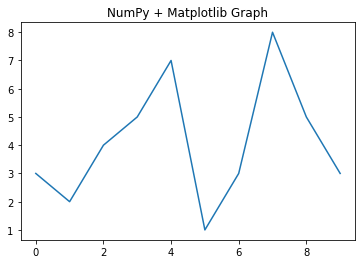

In [ ]:
#Matplotlib 라이브러리
import matplotlib.pyplot as plt
plt.plot(x,y,'-')
plt.title('NumPy + Matplotlib Graph')
plt.show()

##02 이미지의 이해

**02.1 Pillow와 NumPy 배열을 사용해 이미지 생성**


In [ ]:
from PIL import Image
import numpy as np
import pandas as pd

#2x2 빨간색 이미지 생성
img = Image.new('RGB', (2,2), color = 'red')
print('image size: '+str(img.size)+'\n')

#이미지 출력
display(img)

#이미지 저장
imgPath = '2by2.png'
img.save(imgPath)

image size: (2, 2)



In [ ]:
#NumPy 배열
print(np.array(img))

[[[255   0   0]
  [255   0   0]]

 [[255   0   0]
  [255   0   0]]]


In [ ]:
#NumPy 배열을 Pandas 데이터프레임으로 표현
display(pd.DataFrame.from_records(np.array(img)))

,0,1
0,"[255, 0, 0]","[255, 0, 0]"
1,"[255, 0, 0]","[255, 0, 0]"


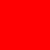

In [ ]:
#이미지를 크게 확대
enlargedImage=img.resize((50,50))

#확대한 이미지 출력
display(enlargedImage)

#확대한 이미지 저장
enlargedPath='50by50.png'
enlargedImage.save(enlargedPath)

In [ ]:
#이미지 불러오기
img = Image.open('/content/2by2.png')
pix = img.load()

#pix[x,y]
print(pix[0,0])
print(pix[1,0])
print(pix[0,1])
print(pix[1,1])

(255, 0, 0)
(255, 0, 0)
(255, 0, 0)
(255, 0, 0)


In [ ]:
#픽셀 색 바꾸기
pix[0,0]=(255,0,0)
pix[1,0]=(0,255,0)
pix[0,1]=(0,0,255)
pix[1,1]=(0,0,0)

print(np.array(img))
display(pd.DataFrame.from_records(np.array(img)))

[[[255   0   0]
  [  0 255   0]]

 [[  0   0 255]
  [  0   0   0]]]


,0,1
0,"[255, 0, 0]","[0, 255, 0]"
1,"[0, 0, 255]","[0, 0, 0]"


In [ ]:
#이미지 출력
display(img)

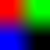

In [ ]:
#이미지를 크게 확대 후 출력
enlargedImage=img.resize((50,50))
display(enlargedImage)

**02.2 Numpy를 사용해 빈 이미지 만들기**
- 파이썬 배열은 자료형이나 크기를 지정하지 않지만 Numpy배열은 명시적으로 자료형을 지정하는 것이 효율적
- RGB image로 만들 것이기 때문에 (세로 픽셀 수, 가로 필셀 수, 컬러 채널)3차원 배열을 생성
- 각각 이미지 픽셀은 (0-255)의 자연수 값을 가짐: 8-bit unsigned integer인  `unint8` 데이터 타입을 사용 
- Matplotlib의 [`plt.savefig()`](https://problemsolvingwithpython.com/06-Plotting-with-Matplotlib/06.04-Saving-Plots/)는 `plt.show()` 전에 사용해야 이미지를 저장





In [ ]:
#OpenCV 라이브러리
import cv2
from google.colab.patches import cv2_imshow #Colab에서만 사용
import numpy as np

#2행, 2열, 3개의 RGB 채널의 모든 값이 0인, 픽셀 당 8 bits 크기를 가진 컬러 이미지를 생성
canvas = np.zeros((2,2,3), np.uint8)

#OpenCV 사용해 이미지 출력 및 저장
cv2_imshow(canvas)
cv2.imwrite("numpyImage.jpg",canvas)

True

[[[0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]]]


,0,1
0,"[0, 0, 0]","[0, 0, 0]"
1,"[0, 0, 0]","[0, 0, 0]"


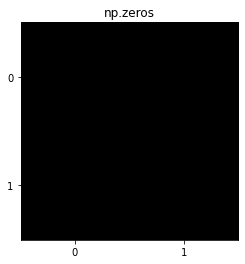

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#2행, 2열, 3개의 RGB 채널의 모든 값이 0인, 픽셀 당 8 bits 크기를 가진 컬러 이미지를 생성
canvas = np.zeros((2,2,3), np.uint8)
print(canvas)

#Pandas 배열 표현
display(pd.DataFrame.from_records(canvas))

#Matplotlib 그래프 표현
plt.title('np.zeros')
plt.xticks([0,1])
plt.yticks([0,1])
plt.imshow(canvas)

#Matplotlib 그래프 저장 **plt.show()이전에 와야 함
plt.savefig("figure1.png", transparent=True)

#Matplotlib 그래프 출력 
plt.show()

**02.3 Matplotlib로 여러 이미지 한 번에 출력**

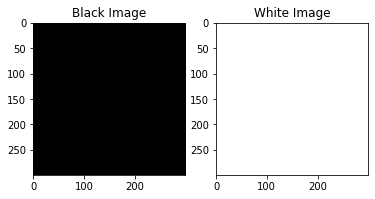

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#300행, 300열, 3개의 RGB 채널, 픽셀 당 8 bits 크기를 가진 검은색과 하얀색 컬러 이미지를 생성
canvas_b = np.zeros((300,300,3), np.uint8) 
canvas_w = np.full((300,300,3), 255, np.uint8)

images = [canvas_b, canvas_w]
titles = ['Black Image','White Image']

fig, axes = plt.subplots(2, 1) # 2개의 그래프가 들어가는 Figure 생성
for i in range(len(images)):
    plt.subplot(1,2,i+1)
    plt.imshow(images[i])
    plt.title(titles[i])

plt.savefig("figure2", transparent=True)
plt.show()

**02.4 OpenCV의 이미지 출력 및 Numpy 배열 표현**

In [ ]:
#구글 드라이브 마운트 하기
from google.colab import drive
drive.mount('/content/drive',force_remount=True)


Mounted at /content/drive


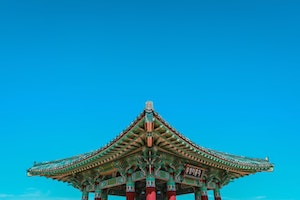

In [ ]:
#OpenCV로 이미지 디스플레이
import cv2
from google.colab.patches import cv2_imshow 

imagePath ='/content/drive/MyDrive/Colab Notebooks/photos/building300x200.jpg' #이미지의 위치로 변경
image = cv2.imread(imagePath) 
cv2_imshow(image)

In [ ]:
#Pandas로 이미지 배열표현 
import pandas as pd
display(pd.DataFrame.from_records(image))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,"[192, 132, 2]","[192, 132, 2]","[192, 132, 2]","[192, 132, 2]","[192, 132, 2]","[192, 132, 2]","[192, 132, 2]","[192, 132, 2]","[191, 131, 1]","[191, 131, 1]","[193, 131, 1]","[193, 131, 1]","[193, 131, 1]","[193, 131, 1]","[193, 131, 1]","[193, 131, 1]","[190, 129, 1]","[190, 129, 1]","[190, 129, 1]","[190, 129, 1]","[190, 129, 1]","[190, 129, 1]","[190, 129, 1]","[190, 129, 1]","[190, 129, 1]","[190, 129, 1]","[190, 129, 1]","[190, 129, 1]","[190, 129, 1]","[190, 129, 1]","[190, 129, 1]","[190, 129, 1]","[188, 130, 1]","[188, 130, 1]","[188, 130, 1]","[188, 130, 1]","[188, 130, 1]","[188, 130, 1]","[188, 130, 1]","[188, 130, 1]",...,"[190, 129, 3]","[190, 129, 3]","[190, 129, 3]","[190, 129, 3]","[190, 129, 3]","[190, 129, 3]","[190, 129, 3]","[190, 129, 3]","[190, 129, 3]","[190, 129, 3]","[190, 129, 3]","[190, 129, 3]","[190, 129, 3]","[190, 129, 3]","[190, 129, 3]","[190, 129, 3]","[190, 129, 3]","[190, 129, 3]","[190, 129, 3]","[190, 129, 3]","[190, 129, 3]","[190, 129, 3]","[190, 129, 3]","[190, 129, 3]","[190, 129, 3]","[190, 129, 3]","[190, 129, 3]","[190, 129, 3]","[190, 129, 3]","[190, 129, 3]","[190, 129, 3]","[190, 129, 3]","[190, 129, 3]","[190, 129, 3]","[190, 129, 3]","[190, 129, 3]","[190, 129, 3]","[190, 129, 3]","[190, 129, 3]","[190, 129, 3]"
1,"[192, 132, 2]","[192, 132, 2]","[192, 132, 2]","[192, 132, 2]","[192, 132, 2]","[192, 132, 2]","[192, 132, 2]","[192, 132, 2]","[191, 131, 1]","[191, 131, 1]","[193, 131, 1]","[193, 131, 1]","[193, 131, 1]","[193, 131, 1]","[193, 131, 1]","[193, 131, 1]","[190, 129, 1]","[190, 129, 1]","[190, 129, 1]","[190, 129, 1]","[190, 129, 1]","[190, 129, 1]","[190, 129, 1]","[190, 129, 1]","[190, 129, 1]","[190, 129, 1]","[190, 129, 1]","[190, 129, 1]","[190, 129, 1]","[190, 129, 1]","[190, 129, 1]","[190, 129, 1]","[189, 131, 2]","[189, 131, 2]","[189, 131, 2]","[189, 131, 2]","[189, 131, 2]","[189, 131, 2]","[189, 131, 2]","[189, 131, 2]",...,"[190, 129, 3]","[190, 129, 3]","[190, 129, 3]","[190, 129, 3]","[190, 129, 3]","[190, 129, 3]","[190, 129, 3]","[190, 129, 3]","[190, 129, 3]","[190, 129, 3]","[190, 129, 3]","[190, 129, 3]","[190, 129, 3]","[190, 129, 3]","[190, 129, 3]","[190, 129, 3]","[190, 129, 3]","[190, 129, 3]","[190, 129, 3]","[190, 129, 3]","[190, 129, 3]","[190, 129, 3]","[190, 129, 3]","[190, 129, 3]","[190, 129, 3]","[190, 129, 3]","[190, 129, 3]","[190, 129, 3]","[190, 129, 3]","[190, 129, 3]","[190, 129, 3]","[190, 129, 3]","[190, 129, 3]","[190, 129, 3]","[190, 129, 3]","[190, 129, 3]","[190, 129, 3]","[190, 129, 3]","[190, 129, 3]","[190, 129, 3]"
2,"[192, 132, 2]","[192, 132, 2]","[192, 132, 2]","[192, 132, 2]","[192, 132, 2]","[192, 132, 2]","[192, 132, 2]","[192, 132, 2]","[191, 131, 1]","[191, 131, 1]","[193, 131, 1]","[193, 131, 1]","[193, 131, 1]","[193, 131, 1]","[193, 131, 1]","[193, 131, 1]","[191, 130, 2]","[191, 130, 2]","[191, 130, 2]","[191, 130, 2]","[191, 130, 2]","[191, 130, 2]","[191, 130, 2]","[191, 130, 2]","[191, 130, 2]","[191, 130, 2]","[191, 130, 2]","[191, 130, 2]","[191, 130, 2]","[191, 130, 2]","[191, 130, 2]","[191, 130, 2]","[189, 131, 2]","[189, 131, 2]","[189, 131, 2]","[189, 131, 2]","[189, 131, 2]","[189, 131, 2]","[189, 131, 2]","[189, 131, 2]",...,"[190, 129, 3]","[190, 129, 3]","[190, 129, 3]","[190, 129, 3]","[190, 129, 3]","[190, 129, 3]","[190, 129, 3]","[190, 129, 3]","[190, 129, 3]","[190, 129, 3]","[190, 129, 3]","[190, 129, 3]","[190, 129, 3]","[190, 129, 3]","[190, 129, 3]","[190, 129, 3]","[190, 129, 3]","[190, 129, 3]","[190, 129, 3]","[190, 129, 3]","[190, 129, 3]","[190, 129, 3]","[190, 129, 3]","[190, 129, 3]","[190, 129, 3]","[190, 129, 3]","[190, 129, 3]","[190, 129, 3]","[192, 129, 1]","[192, 129, 1]","[192, 129, 1]","[192, 129,

In [ ]:
#이미지를 표현하는 자료형
print("type(image): {}".format(type(image)))
print("\n")

#NumPy ndim: 차원의 수
print("이미지 배열 차원 수(image.ndim): {}".format(image.ndim))
#NumPy shape: 각 차원의 크기 (튜플로 표현)
print("이미지 각 차원의 크기(image.shape): {}".format(image.shape))
print("세로(image.shape[0]): {} 픽셀".format(image.shape[0]))
print("가로(image.shape[1]): {} 픽셀".format(image.shape[1]))
print("채널(image.shape[2]): {} 색상채널".format(image.shape[2]))
print("\n")

#NumPy size: 전체 요소의 개수
print("이미지 배열의 전체 요소 갯수(image.size): {}".format(image.size))
#NumPy dtype: 요소의 데이터 타입
print("이미지 배열의 각 요소 데이터 타입: {}".format(image.dtype))
#NumPy itemsize: 각 요소의 byte 크기
print("배열의 각 요소의 크기: {}byte (1byte=8bits)".format(image.itemsize))

type(image): <class 'numpy.ndarray'>


이미지 배열 차원 수(image.ndim): 3
이미지 각 차원의 크기(image.shape): (200, 300, 3)
세로(image.shape[0]): 200 픽셀
가로(image.shape[1]): 300 픽셀
채널(image.shape[2]): 3 색상채널


이미지 배열의 전체 요소 갯수(image.size): 180000
이미지 배열의 각 요소 데이터 타입: uint8
배열의 각 요소의 크기: 1byte (1byte=8bits)


**02.5 OpenCV와  Numpy, Matplotlib을 사용할 때 많은 사람들이 실수하는 것**
1. Matplotlib는 RGB시스템을 사용하지만 OpenCV는 BGR 시스템을 사용한다. (참고: [RGB가 아닌 BGR로 쓰게 된 이유](https://learnopencv.com/why-does-opencv-use-bgr-color-format/))
2. 이미지 좌표(x,y) 시스템은 좌측상단(0,0)을 기준으로 우측으로 갈 수록 x값⬆, 하단으로 갈 수록 y값⬆ 
3. 이미지를 Numpy행렬(Matrix)로 표현 시 [행/rows, 열/columns]로 표현되기 때문에 `image[y,x]`


01. OpenCV BGR이미지 출력


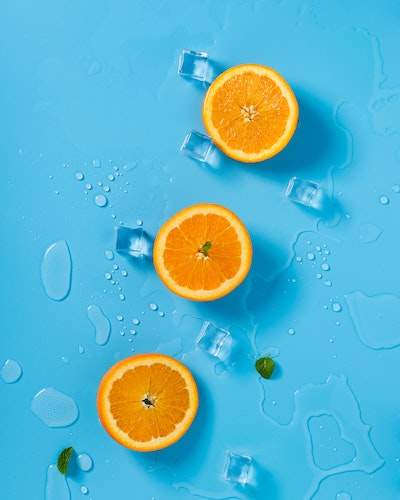

02. OpenCV BGR이미지를 Matplotlib로 출력


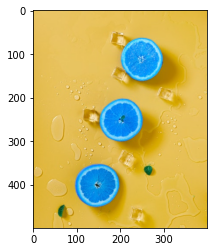

03. OpenCV 이미지를 RGB이미지로 변환 후 Matplotlib로 출력


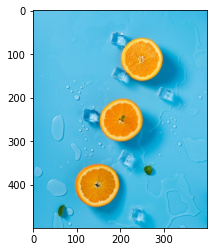

In [ ]:
import cv2
from google.colab.patches import cv2_imshow 
import matplotlib.pyplot as plt

imagePath ='/content/drive/MyDrive/Colab Notebooks/photos/orange400x500.jpg' #이미지의 위치로 변경
image = cv2.imread(imagePath) 

print("01. OpenCV BGR이미지 출력")
cv2_imshow(image)

print("02. OpenCV BGR이미지를 Matplotlib로 출력")
plt.imshow(image)
plt.show()

print("03. OpenCV 이미지를 RGB이미지로 변환 후 Matplotlib로 출력")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

(0,0)좌표위치 픽셀 - Red:98, Green:194, Blue:232
(200,250)좌표위치 픽셀 - Red:167, Green:89, Blue:0


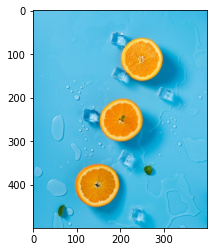

In [ ]:
#이미지 왼쪽 상단 (0,0) 픽셀의 OpenCV(BGR)컬러값
(b,g,r) = image[0,0]
print("(0,0)좌표위치 픽셀 - Red:{}, Green:{}, Blue:{}".format(r,g,b))

#이미지 중앙 픽셀 구하기 //버림(Floor division)
(centerY,centerX)=(image.shape[0]//2,image.shape[1]//2)
(b,g,r) = image[centerY,centerX]
print("({},{})좌표위치 픽셀 - Red:{}, Green:{}, Blue:{}".format(centerX,centerY,r,g,b))

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

변경 전 (200,250)좌표위치 픽셀 - Red:167, Green:89, Blue:0
변경 후 (200,250)좌표위치 픽셀 - Red:255, Green:255, Blue:255


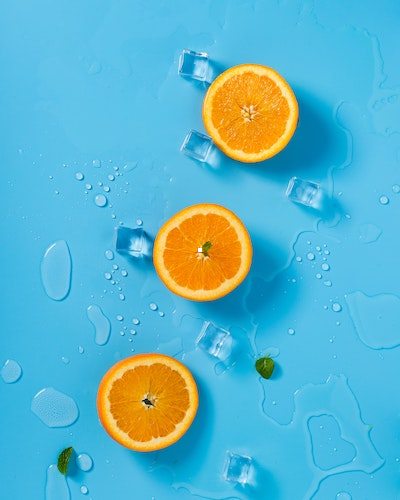

In [ ]:
#이미지의 픽셀 색상 바꾸기
(b,g,r) = image[centerY,centerX]
print("변경 전 ({},{})좌표위치 픽셀 - Red:{}, Green:{}, Blue:{}".format(centerX,centerY,r,g,b))

#이미지 중앙 픽셀의 색상 값 바꾸기
image[centerY-2:centerY+2,centerX-2:centerX+2]=(255,255,255)
(b,g,r) = image[centerY,centerX]
print("변경 후 ({},{})좌표위치 픽셀 - Red:{}, Green:{}, Blue:{}".format(centerX,centerY,r,g,b))

cv2_imshow(image)

##03 이미지 프로세싱 기초

**03.1 ROI 표현하기**

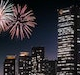

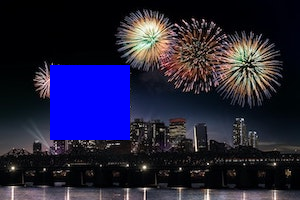

In [ ]:
import cv2
from google.colab.patches import cv2_imshow 

imagePath ='/content/drive/MyDrive/Colab Notebooks/photos/nightcity300x200.jpg' #이미지의 위치로 변경
image = cv2.imread(imagePath) 

#부분 이미지 출력: image[Y-start:Y-end, X-start:X-end]
ROI = image[65:140, 50:130]
cv2_imshow(ROI)

#이미지 색상 변환: image[Y-start:Y-end, X-start:X-end]
image[65:140, 50:130] = (255,0,0)
cv2_imshow(image)

**03.2 이미지를 특정 컬러스페이스 읽기**


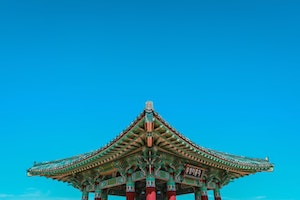

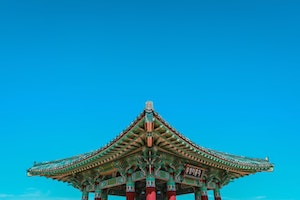

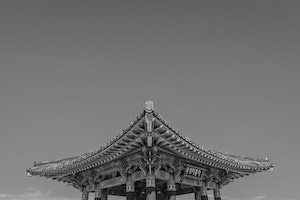

In [ ]:
import cv2
from google.colab.patches import cv2_imshow # for image display

imagePath ='/content/drive/MyDrive/Colab Notebooks/photos/building300x200.jpg' 

image = cv2.imread(imagePath)
image_color = cv2.imread(imagePath,cv2.IMREAD_COLOR)
image_grayscale = cv2.imread(imagePath,cv2.IMREAD_GRAYSCALE)

cv2_imshow(image)
cv2_imshow(image_color)
cv2_imshow(image_grayscale)

**03.3 이미지의 RGB 채널 분리하기**

- **cv2.split()** 함수는 BGR 채널별로 분리해서 **튜플로 값을 반환**

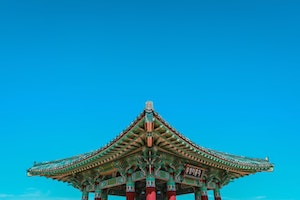

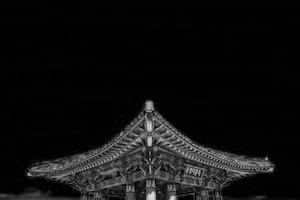

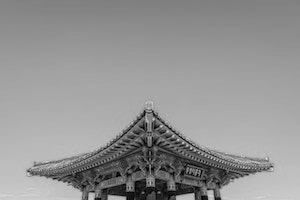

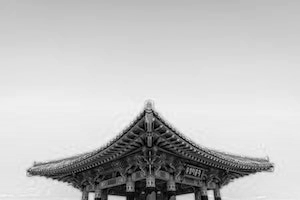

In [ ]:
import cv2
from google.colab.patches import cv2_imshow # for image display

imagePath ='/content/drive/MyDrive/Colab Notebooks/photos/building300x200.jpg' #이미지의 위치로 변경
image = cv2.imread(imagePath)
cv2_imshow(image)

#(B,G,R) = cv2.split(image)
(B,G,R) = image[:, :, 0], image[:, :, 1], image[:, :, 2]

cv2_imshow(R)
cv2_imshow(G)
cv2_imshow(B)

**03.4 이미지의 RGB 채널 합치기**
- **cv2.merge()** 함수는 BGR 채널을 합쳐서 BGR 이미지로 반환

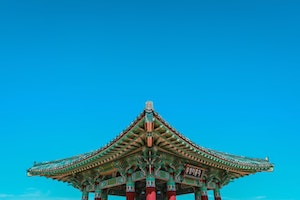

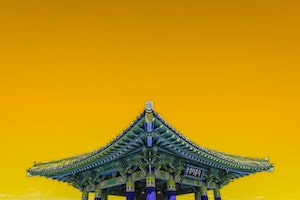

In [ ]:
import cv2
from google.colab.patches import cv2_imshow # for image display

imagePath ='/content/drive/MyDrive/Colab Notebooks/photos/building300x200.jpg' #이미지의 위치로 변경
image = cv2.imread(imagePath)

(B,G,R) = cv2.split(image)
mergedBGR = cv2.merge([B,G,R])
mergedRGB = cv2.merge([R,G,B])

cv2_imshow(mergedBGR)
cv2_imshow(mergedRGB)

**03.5 분리한 이미지의 R,G,B 값을 각각의 컬러값으로 표현하기**

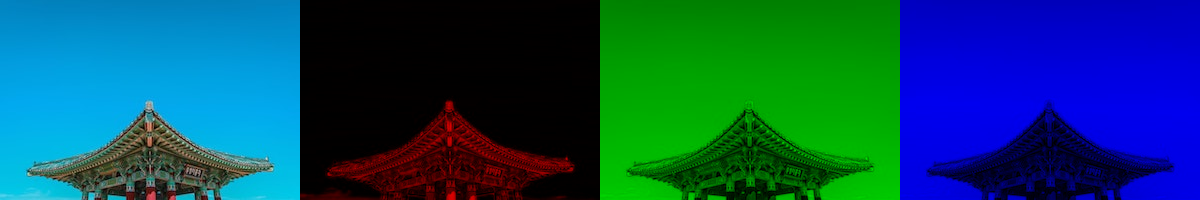

In [ ]:
zeros = np.zeros(image.shape[:2], dtype = "uint8")

red = cv2.merge([zeros, zeros, R])
green = cv2.merge([zeros, G, zeros])
blue = cv2.merge([B, zeros, zeros])

RGBChannel_frame = cv2.hconcat((image,red,green,blue))
cv2_imshow(RGBChannel_frame)

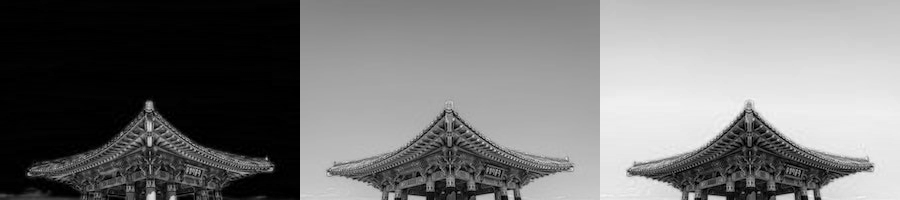

In [ ]:
RGBChannel_frame = cv2.hconcat((R,G,B))
cv2_imshow(RGBChannel_frame)

**03.6 BGR채널을 다른 컬러스페이스로 변환하기**

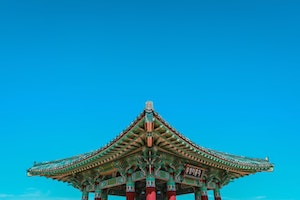

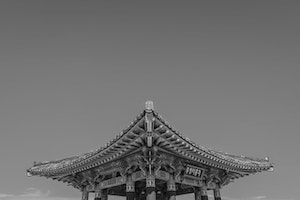

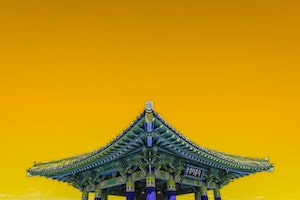

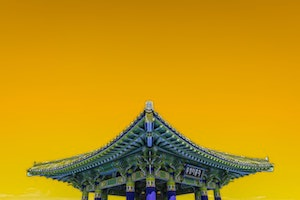

In [ ]:
import cv2
from google.colab.patches import cv2_imshow # for image display

imagePath ='/content/drive/MyDrive/Colab Notebooks/photos/building300x200.jpg' 

bgrImage = cv2.imread(imagePath)
gray = cv2.cvtColor(bgrImage, cv2.COLOR_BGR2GRAY)
rgb = cv2.cvtColor(bgrImage, cv2.COLOR_BGR2RGB)
rgba = cv2.cvtColor(bgrImage, cv2.COLOR_BGR2RGBA)

cv2_imshow(bgrImage)
cv2_imshow(gray)
cv2_imshow(rgb)
cv2_imshow(rgba)

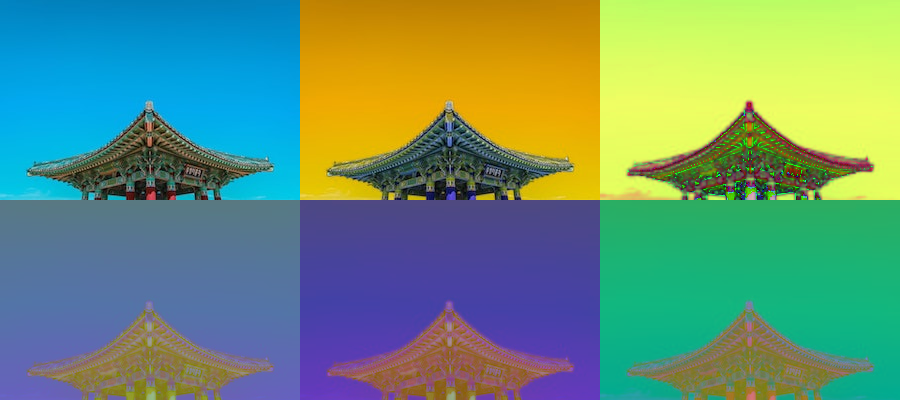

In [ ]:
import cv2
from google.colab.patches import cv2_imshow # for image display

imagePath ='/content/drive/MyDrive/Colab Notebooks/photos/building300x200.jpg' 
bgrImage = cv2.imread(imagePath)

rgb = cv2.cvtColor(bgrImage, cv2.COLOR_BGR2RGB)
hsv = cv2.cvtColor(bgrImage, cv2.COLOR_BGR2HSV)
lab = cv2.cvtColor(bgrImage, cv2.COLOR_BGR2LAB)
luv = cv2.cvtColor(bgrImage, cv2.COLOR_BGR2LUV)
yuv = cv2.cvtColor(bgrImage, cv2.COLOR_BGR2YUV)

colorSpace1 = cv2.hconcat((bgrImage,rgb,hsv))
colorSpace2 = cv2.hconcat((lab,luv,yuv))
colorSpace_frame = cv2.vconcat((colorSpace1,colorSpace2))
cv2_imshow(colorSpace_frame)

In [ ]:
#opencv로 드라이브에 이미지 저장
cv2.imwrite('colorSpace.jpg', colorSpace_frame)

True

**03.7 Matplotlib를 사용 시 RGB 컬러스페이스로 변환하기**

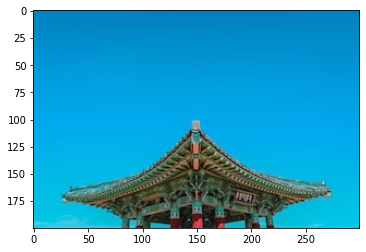

In [ ]:
import cv2
from google.colab.patches import cv2_imshow # for image display
import matplotlib.pyplot as plt

imagePath ='/content/drive/MyDrive/Colab Notebooks/photos/building300x200.jpg' #이미지의 위치로 변경
image = cv2.imread(imagePath) 

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

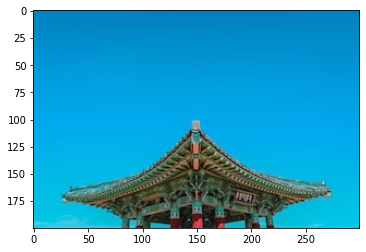

In [ ]:
#Matplotlib를 사용해 figure 드라이브에 저장
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.savefig('matplotlib_figure.png', transparent=True)

In [ ]:
#파일 내 컴퓨터로 다운로드받기
from google.colab import files
files.download('matplotlib_figure.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##04 OpenCV로 그림 그리기

**04.1 선 그리기**

```python
cv2.line(image, start, end, color[, thickness, lineType])
```

시작점과 끝점 점을 연결한 직선 출력

Parameters:	
* **image** – 그림을 그릴 이미지 파일
* **start** – 시작점 좌표 e.g. (0,0)
* **end** – 끝점 좌표 e.g. (500. 500)
* **color** – BGR형태의 Color e.g. (255,0,0)→파란색
* **thickness** – 선의 두께 (픽셀, 정수)
* **lineType** – 선의 종류

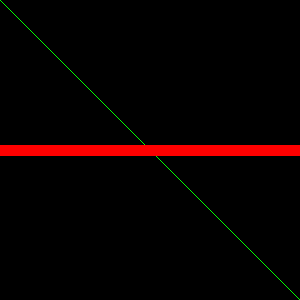

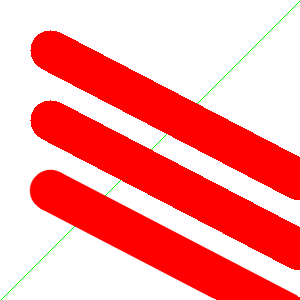

In [ ]:
import cv2
from google.colab.patches import cv2_imshow #colab 호환 가능한 imshow 함수
import numpy as np
import matplotlib.pyplot as plt

# 300행, 300열, 3개의 RGB 채널을 가진 컬러 이미지를 생성
# RGB image를 사용할 것이기 때문에 0-255까지의 8-bit unsigned integer를 사용
canvas_b = np.zeros((300,300,3), np.uint8) 
canvas_w = np.full((300,300,3), 255, np.uint8)

#opencv에서 색은 (B,G,R)로 표현되지만 matplotlib에서는 (R,G,B)로 표현된다.
opencv_red=(0,0,255)
opencv_green=(0,255,0)
opencv_blue=(255,0,0)

#cv2.line(image, start, end, color, [thickness, linetype]): 직선함수
cv2.line(canvas_b, (0,0),(300, 300), opencv_green) 
cv2.line(canvas_b, (0,150),(300,150), opencv_red, 10)  #라인두께:10

cv2.line(canvas_w, (0,300),(300,0), opencv_green) 
cv2.line(canvas_w, (50,50),(300,180), opencv_red, 40, cv2.LINE_4)   #라인종류: 브레젠햄(Bresenham) 알고리즘의 4연결
cv2.line(canvas_w, (50,120),(300,250), opencv_red, 40, cv2.LINE_8)  #라인종류: 브레젠햄(Bresenham) 알고리즘의 8연결
cv2.line(canvas_w, (50,190),(300,320), opencv_red, 40, cv2.LINE_AA) #라인종류: 가우시안 필터

cv2_imshow(canvas_b)
cv2_imshow(canvas_w)

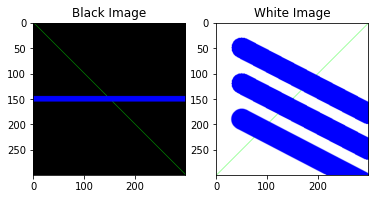

In [ ]:
#opencv 색상을 matplotlib에서 표현
images = [canvas_b, canvas_w]
titles = ['Black Image','White Image']

for i in range(len(images)):
    plt.subplot(1,2,i+1),plt.imshow(images[i])
    plt.title(titles[i])

plt.show()

**04.2 도형 그리기**

**사각형 그리기**
```
cv2.rectangle(image, start, end, color, [thickness, linetype]): 사각형 함수
```
Parameters:	
* **image** – 그림을 그릴 이미지 파일
* **start** – 시작점 좌표 e.g. (0,0)
* **end** – 끝점 좌표 e.g. (500. 500)
* **color** – BGR형태의 Color e.g. (255,0,0)→파란색
* **thickness** – 선의 두께 (픽셀, 정수, -1:채우기)

<br>

**원 그리기**
```
cv2.circle(image, center, radian, color, [thickness, linetype])
```
Parameters:	
* **image** – 그림을 그릴 이미지 파일
* **center** – 원의 중심 좌표(x, y)
* **radian** – 반지름
* **color** – BGR형태의 Color e.g. (255,0,0)→파란색
* **thickness** – 선의 두께 (픽셀, 정수, -1:채우기)

<br>

**타원 그리기**
```
cv2.ellipse(image, center, axes, angle, startAngle, endAngle, color, [thickness, linetype])
```
Parameters:	
* **image** – 그림을 그릴 이미지 파일
* **axes** – 중심에서 가장 큰 거리와 작은 거리
* **angle** – 타원의 기울기 각
* **startAngle** – 타원의 시작 각도
* **endAngle** – 타원이 끝나는 각도
* **color** – BGR형태의 Color
* **thickness** – 선의 두께 (픽셀, 정수, -1:채우기)

<br>

**다각형 선 그리기**
```
cv2.polylines(img, points, isClosed, color, [thickness, linetype])
```
Parameters:	
* **image** – 그림을 그릴 이미지 파일
* **points** -  연결할 꼭지점 좌표들의 배열
* **isClosed** – 닫흰 도형 여부
* **color** – BGR형태의 Color
* **thickness** – 선의 두께 (채우기X)

<br>

**다각형 채우기**
```
cv2.fillPoly(image, points, is_closed, color, [thickness, linetype])
```
* **image** – 그림을 그릴 이미지 파일
* **points** -  연결할 꼭지점 좌표들의 배열
* **isClosed** – 닫흰 도형 여부
* **color** – BGR형태의 Color
* **thickness** – 선의 두께


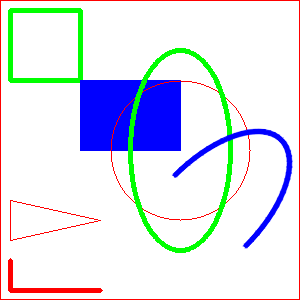

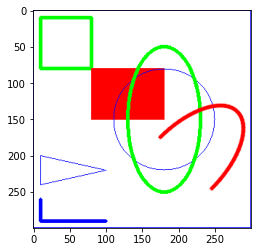

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

canvas_w = np.full((300,300,3), 255, np.uint8)
cv2.rectangle(canvas_w,(0,0),(299,299),opencv_red)
cv2.rectangle(canvas_w,(10,10),(80,80),opencv_green,4)
cv2.rectangle(canvas_w,(80,80),(180,150),opencv_blue,-1)

cv2.circle(canvas_w,(180,150),70,opencv_red)
cv2.ellipse(canvas_w,(180,150),(50,100),0,0,360,opencv_green,4)
cv2.ellipse(canvas_w,(210,210),(50,100),45,180,360,opencv_blue,4,cv2.LINE_AA)


triangle1 = np.array([[10,200],[10, 240],[100, 220]])
triangle2 = np.array([[10,260],[10, 290],[100, 290]])
cv2.polylines(canvas_w, [triangle1], True, opencv_red,1)
cv2.polylines(canvas_w, [triangle2], False, opencv_red,4)


#opencv 색상을 opencv에서 표현
cv2_imshow(canvas_w)
#opencv 색상을 matplotlib에서 표현
plt.imshow(canvas_w)
plt.show()

**04.3 글씨 쓰기**

```
cv2.putText(img, text, position, font, fontSacle, color)
```
Parameters:	
* **image** – 그림을 그릴 이미지 파일
* **text** – 표시할 문자열
* **position** – 텍스트가 출력될 좌표 (좌측하단 기준: x,y)
* **font** – 글씨체 CV2.FONT_XXX
* **fontSacle** – 글씨 크기
* **color** – RGB 폰트색상


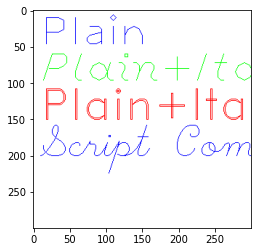

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

canvas_w = np.full((300,300,3), 255, np.uint8)


cv2.putText(canvas_w, 'Plain', (10, 50), cv2.FONT_HERSHEY_PLAIN, 4, opencv_red)
cv2.putText(canvas_w, 'Plain+Italic', (10, 100), cv2.FONT_HERSHEY_PLAIN|cv2.FONT_ITALIC, 4, opencv_green)
cv2.putText(canvas_w, 'Plain+Italic', (10, 150), cv2.FONT_HERSHEY_DUPLEX, 2, opencv_blue)
cv2.putText(canvas_w, 'Script Complex', (10, 200), cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, 2, opencv_red)

plt.imshow(canvas_w)
plt.show()

**04.4 ROI 표현하기II**

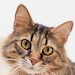

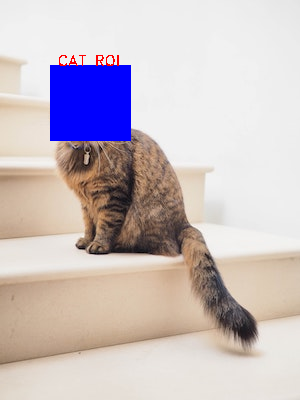

In [ ]:
import cv2
from google.colab.patches import cv2_imshow 
import matplotlib.pyplot as plt

imagePath ='/content/drive/MyDrive/Colab Notebooks/photos/cat300x400.jpg' #이미지의 위치로 변경
image = cv2.imread(imagePath) 

(x,y) = (50,65)
(width,height) = (80,75)

#부분 이미지 출력: image[Y-start:Y-end, X-start:X-end]
ROI = image[y:y+height, x:x+height]
cv2_imshow(ROI)


#이미지 위에 ROI 그리기: cv2.rectangle(image, start, end, color, [thickness, linetype])  
cv2.rectangle(image,(x,y),(x+width,y+height),(255,0,0),-1)
cv2.putText(image,'CAT ROI',(x+7,y),cv2.FONT_HERSHEY_DUPLEX,0.5,(0,0,255))

cv2_imshow(image)